<div style="background-color: #d9ffd4; padding: 20px; border-radius: 10px;">
    <h1 style="color: #2F4F4F; font-family: Calibri, sans-serif; text-align: center;">Clase 3</h1>
    <p style="color: #2F4F4F; font-family: Calibri, Courier, monospace; text-align: center; font-size: 24px;">
        Errores de redondeo y errores de aproximación
    </p>
</div>

In [1]:
# importamos librerías
import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt

<div style="background-color: #d4eeff; color: black; padding: 10px; border-radius: 5px;">

---

### **Expansión en Serie de Taylor**

Una expansión en serie de Taylor es una forma de aproximar una función matemática *"complicada"* utilizando una serie de términos más simples. Básicamente, se descompone la función en una suma infinita de términos polinómicos, donde cada término se calcula a partir de las derivadas de la función evaluadas en un punto específico $x_0$:

$$ f(x) = \sum_{n=0}^{\infty} \frac{f^{(n)}(x_0)}{n!} (x-x_0)^n = a_0 + a_1 (x-x_0) + a_2 (x-x_0)^2 + a_3 (x-x_0)^3 + ... $$

Esta aproximación es útil para hacer cálculos aproximados de funciones complejas alrededor de un punto conocido $x_0$.

Generalmente se utiliza $x_0=0$, lo que se conoce como Expansión en Serie de Maclaurin:

$$ f(x) = \sum_{n=0}^{\infty} \frac{f^{(n)}(0)}{n!} x^n = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + ... $$


---
</div>

<div style="background-color: #FFF9AD; color: black; padding: 10px; border-radius: 5px;">

**Ejercicio 1:** Implemente la expansión en serie de Maclaurin ($x_0=0$), para aproximar la función $e^{-x}$:

$$ e^{-x} = \sum_{n=0}^{\infty} \frac{(-x)^n}{n!} \approx \sum_{n=0}^{N} \frac{(-x)^n}{n!} = e^{-x} + \varepsilon(x,N)$$

Utilice para ello $N=0,2,4,6$ y evalúe la función en el dominio $x \in [0,2]$.

Grafique $e^{-x}$ vs $x$ para cada $N$ (es decir, dibuje las curvas de las 4 aproximaciones).

Grafique además el valor "real" `np.exp(-x)`.

</div>

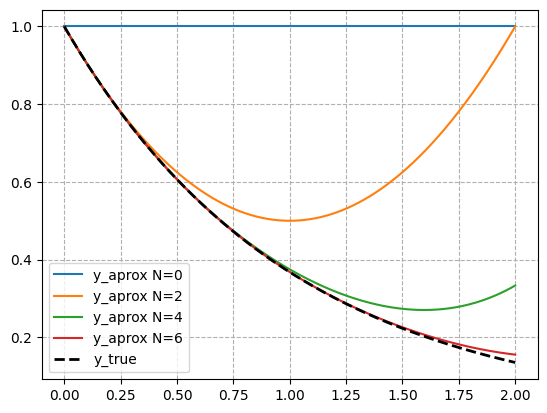

In [ ]:
# su solución acá

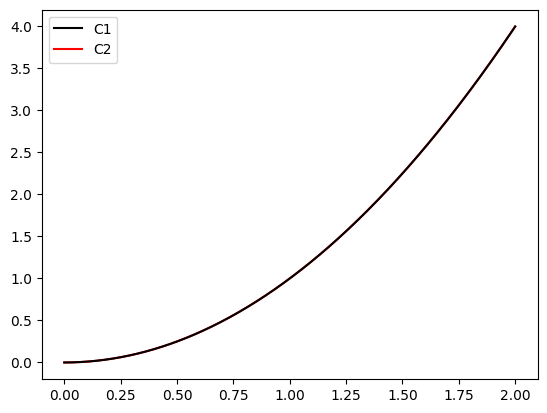

In [30]:
y = x**2

plt.plot(x, y, label="C1", color="k", zorder=2)
plt.plot(x, y, label="C2", color="r", zorder=1)

plt.legend()


In [10]:
np.linspace(start=0, stop=10, num=5)



array([ 0. ,  2.5,  5. ,  7.5, 10. ])

Calcule el error relativo porcentual en $x=5$ considerando $N=1,2,...,20$, es decir:

$$ \varepsilon_\% = 100 \cdot \left | \frac{\text{real} - \text{aprox}}{\text{real}} \right |$$

In [ ]:
#...

<div style="background-color: #FFF9AD; color: black; padding: 10px; border-radius: 5px;">

**Ejercicio 2:** Calcule la aproximación en serie de Maclaurin de $f(x) = \ln(1+x)$

$$ \ln(1+x) \approx \sum_{n=1}^N  \frac{(-1)^{n+1}}{n} x^n = x- \frac{x^2}{2} + \frac{x^3}{3} - ...$$

y evalúela en $x=1.2$. Pruebe de $N=1,2,3,...,20$

In [ ]:
def maclaurin_ln_1_x(x, N):
    """
    Calcula una aproximación de ln(1 + x) utilizando la serie de Maclaurin con n términos.
    """      
    return ???

<div style="background-color: #d4eeff; color: black; padding: 10px; border-radius: 5px;">

---
### **Más sobre sumatorias y errores numéricos**

---
</div>


<div style="background-color: #FFF9AD; color: black; padding: 10px; border-radius: 5px;">

**Ejericio 3**: Calcule las siguientes sumatorias (de subida y de bajada), considerando $N=2,3,4,5,…,10000$. Grafique $|S_\uparrow - S_\downarrow|$ vs $N$.

$$ S_\uparrow = \sum_{n=1}^N \frac{1}{n}~~,~~S_\downarrow = \sum_{n=N}^1 \frac{1}{n} $$

*Recomendación:* Es muy conveniente definir funciones que ejecuten un proceso en específico, sabiendo que es probable que más adelante necesitemos ejecutar ese proceso muchas veces. Por lo tanto, defina una función que realice el cálculo de la suma $S_\uparrow$ y otra para la suma $S_\downarrow$, hasta cualquier valor específico $N$.

</div>

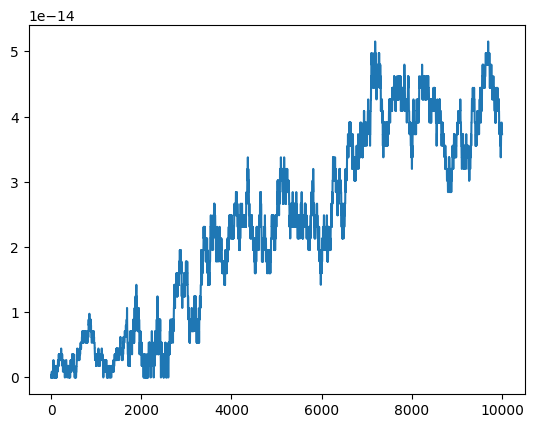

In [43]:
def S_up(N):
    s=0
    for n in range(1, N+1):
        s += 1/n
    return s

def S_down(N):
    s=0
    for n in np.arange(N, 0, -1):
        s += 1/n
    return s

# s_up = []
# s_down = []

diferencia = []

for N in range(1, 10001):
    sup = S_up(N)
    sdown = S_down(N)

    diff = abs(sup - sdown)

    #s_up.append(sup)
    #s_up.append(sdown)

    diferencia.append(diff)


plt.plot(range(1, 10001), diferencia)

In [40]:
for n in range(10, 0, -1):
    print(n)

10
9
8
7
6
5
4
3
2
1


In [42]:
for n in range(1, 2):
    print(n)

1


Con las funciones ya definidas, procedemos a llamarlas dentro de un ciclo `for`, para calcular las sumas considerando una lista $N$ en el rango `N_range=range(1, N+1)`

In [ ]:
#...

En general, numéricamente no se cumple la propiedad asociativa de la suma, por lo tanto, el orden de los sumandos si altera la suma. 😵🙃

<div style="background-color: #FFF9AD; color: black; padding: 10px; border-radius: 5px;">

**Ejercicio 4:** Calcule las siguientes sumatorias que matemáticamente son equivalentes, considerando $N=10^0,10^1,10^2,…,10^5$. Grafique en una misma figura, las tendencias $S_1$ vs $N$ y $S_2$  vs $N$. ¿Para qué valor de $N$, $S_1$ y $S_2$ presentan la menor diferencia?

\begin{align*}

S_1 & = \sum_{i=1}^{N} \frac{2i}{2i+1} - \sum_{i=1}^{N} \frac{2i-1}{2i} \\

S_2 & = \sum_{i=1}^{N} \frac{1}{2i(2i+1)}

\end{align*}

Comience analizando el problema para un valor $N=10$:

In [ ]:
#...

<div style="background-color: #d9ffd4; color: black; padding: 10px; border-radius: 5px;">

**Conclusión:** ¿Qué aprendimos?

1. Existen dos tipos de errores numéricos comunes en los cálculos computacionales:

    * Error de redondeo: Surge debido a la cantidad limitada de bits disponibles para representar los números en la computadora.

    * Error de aproximación: Ocurre cuando se emplean métodos o algoritmos matemáticos que solo ofrecen una solución aproximada al problema.

2. El orden en que se suman los términos sí influye en el resultado final de una suma en el contexto computacional.

3. En una serie numérica, aumentar el número de términos $N$ no siempre reduce el error total. Aunque un $N$ mayor disminuye el error de aproximación, también puede incrementar el error de redondeo acumulativo, afectando la precisión del resultado.


**Próxima clase:** Métodos de derivación numérica.
</div>

<div style="padding: 15px; border-top: 2px solid #2F4F4F; margin-top: 30px; background-color: var(--custom-bg-color); color: var(--custom-text-color);">
    <p style="font-family: Calibri, sans-serif; text-align: left; font-size: 16px;">
        Omar Fernández <br>
        Profesor de Física Computacional III para Astrofísica <br>
        Ingeniero Físico <br>
        <a href="mailto:omar.fernandez.o@usach.cl" class="email-link">omar.fernandez.o@usach.cl</a> <br>
    </p>
</div>

<style>
:root {
    --custom-bg-color: #F8F8F8;
    --custom-text-color: #2F4F4F;
    --custom-link-color: blue;
}

@media (prefers-color-scheme: dark) {
    :root {
        --custom-bg-color: #444444;
        --custom-text-color: #F8F8F8;
        --custom-link-color: magenta;
    }
}

.email-link {
    color: var(--custom-link-color);
}
</style>